In [61]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import display
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import HBox, VBox

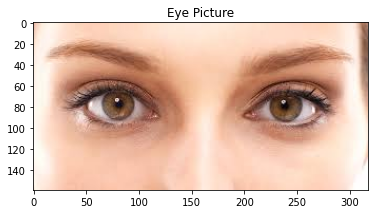

In [86]:
req = urllib.request.urlopen('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFLv8W3mBSyuSCAwSIIH4wFGOR35c59hS4NQ&usqp=CAU')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
image = cv2.imdecode(arr, -1) # 'Load it as it is'
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Eye Picture')
plt.show()

In [94]:
@widgets.interact_manual(
    min_threshold=100, max_threshold=100)
def plot(min_threshold, max_threshold):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,min_threshold,max_threshold)
    cv2_imshow(edges)

interactive(children=(IntSlider(value=100, description='min_threshold', max=300, min=-100), IntSlider(value=10…

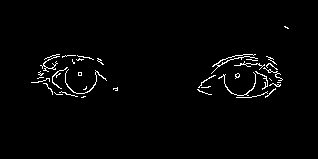

In [95]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray,189,300)
cv2_imshow(edges)

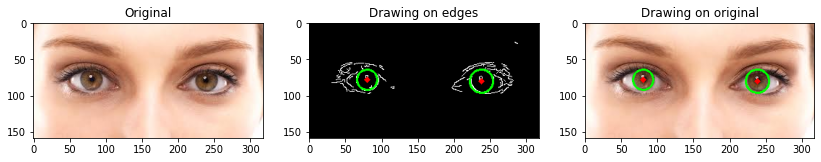

In [113]:
img = image.copy()
edge=edges.copy()
edge = cv2.cvtColor(edge, cv2.COLOR_BGR2RGB)
circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(edge,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(img,(i[0],i[1]),2,(255,0,0),3)
    cv2.circle(edge,(i[0],i[1]),2,(255,0,0),3)
plt.figure(figsize=(14,20))
plt.subplot(1,3,1)
plt.title('Original')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('Drawing on edges')
plt.imshow(edge)

plt.subplot(1,3,3)
plt.title('Drawing on original')
plt.imshow(img)

plt.show()